# <span style="color:lime;"> About Me </span>

Hello. I am Gizem Nalbant Arslan, a data scientist who loves to draw insights using the power of data and is always ready to explore new horizons in the world of machine learning.

After graduating from Industrial Engineering, I joined the continuous improvement department in the automotive industry. Leading projects here allowed me to discover my passion for data science, and I embarked on a fresh start in my career. Your support along this journey means a lot to me.

You can reach my [LinkedIn](http://https://www.linkedin.com/in/gizem-nalbant-arslan/) profile. 🔗

I look forward to meeting you.

Skills:

* Data Science 📊
* SQL 🗄️
* Python 🐍
* Machine Learning 🤖
* Statistical Models 📈


# <p style="text-align:center;"> About the Competition and Data </p> 

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Predict Students' Dropout and Academic Success dataset. Feature distributions are close to, but not exactly the same, as the original.

Files
train.csv - the training dataset; Target is the categorical target
test.csv - the test dataset; your objective is to predict the class of Target for each row
sample_submission.csv - a sample submission file in the correct format

**The goal of this competition is to predict academic risk of students in higher education.**

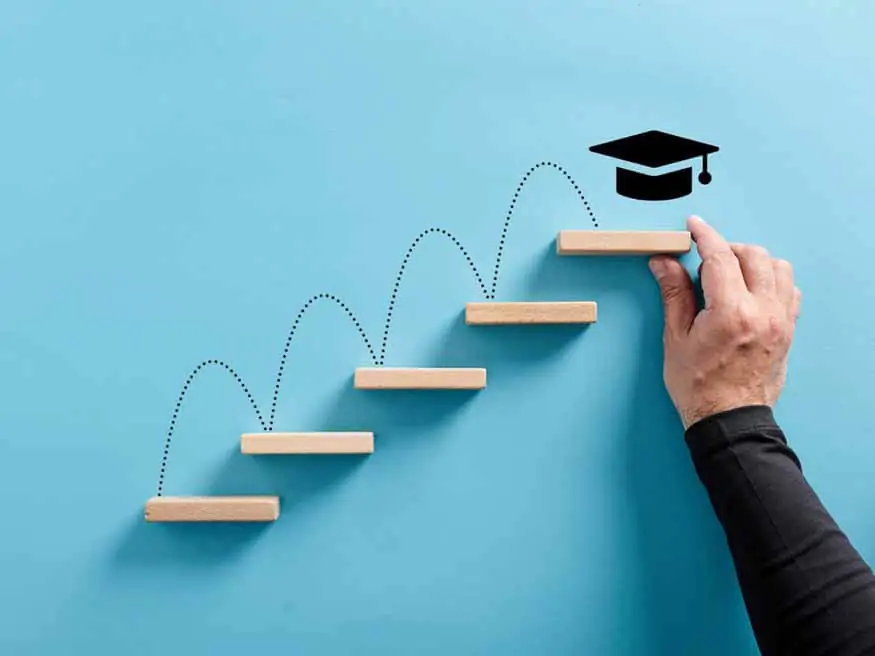

# 1. IMPORT

In [1]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | / done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 66.7 MB/s eta 0:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics._scorer import _SCORERS
from sklearn.model_selection import cross_val_score


import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
train_ = pd.read_csv("/kaggle/input/playground-series-s4e6/train.csv")
train=train_.copy()
test_ = pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv")
test=test_.copy()

# 2. DATA PREPRATION

In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    
check_df(train)

##################### Shape #####################
(76518, 38)
##################### Types #####################
id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational specia

> Train dataset occurs 76518 rows and 38 columns. It seems all variable are numeric except target.(We'll examine this.) and there isn't any NA variable.

> # 2.1 Definition of Functions

First of all, let's define our functions. The functions we will use here and their tasks are as follows:

* **cat_summary** : analysis of categorical variables
* **num_summary** : review of numeric variables
* **target_summary_with_num**: analysis of the relationship of numeric variables with the target variable
* **target_summary_with_cat** : analyzing the relationship of categorical variables with the target variable
* **correlation_matrix**: analysis of correlations
* **grab_col_names**: detailed categorization of variables

In [5]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

In [6]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(20,20)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=False, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

In [7]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    return cat_cols, num_cols, cat_but_car

> # 2.2. Data Analysis

> First of all,we'll check are the variable types really defined correctly?

In [8]:
cat_cols, num_cols, cat_but_car = grab_col_names(train)
num_cols = [col for col in num_cols if col not in ("id")]
cat_cols = [col for col in cat_cols if col not in ("Target")]

Observations: 76518
Variables: 38
cat_cols: 11
num_cols: 27
cat_but_car: 0
num_but_cat: 10


In [9]:
# Analysis of cat_cols
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(train, col)

                Marital status  Ratio
Marital status                       
1                        70189 91.729
2                         5296  6.921
4                          866  1.132
5                          116  0.152
6                           35  0.046
3                           16  0.021
##########################################
                   Application order  Ratio
Application order                          
1                              54381 71.070
2                               8875 11.599
3                               5364  7.010
4                               3822  4.995
5                               2125  2.777
6                               1947  2.544
0                                  3  0.004
9                                  1  0.001
##########################################
                            Daytime/evening attendance  Ratio
Daytime/evening attendance                                   
1                                             

count   76518.000
mean       16.054
std        16.682
min         1.000
5%          1.000
10%         1.000
20%         1.000
30%         1.000
40%         1.000
50%        17.000
60%        17.000
70%        17.000
80%        39.000
90%        39.000
95%        43.000
99%        44.000
max        53.000
Name: Application mode, dtype: float64


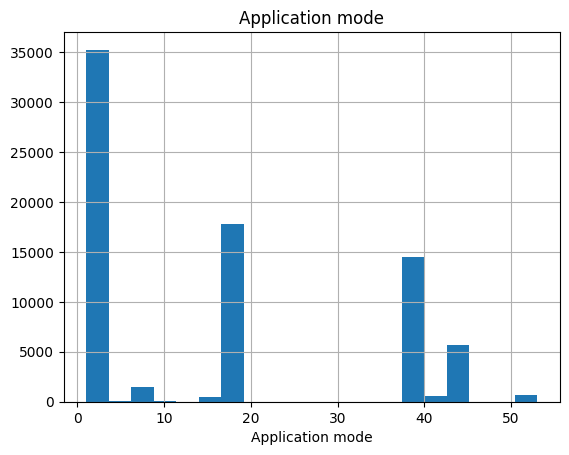

count   76518.000
mean     9001.286
std      1803.439
min        33.000
5%       8014.000
10%      9003.000
20%      9085.000
30%      9147.000
40%      9238.000
50%      9254.000
60%      9500.000
70%      9500.000
80%      9773.000
90%      9773.000
95%      9991.000
99%      9991.000
max      9991.000
Name: Course, dtype: float64


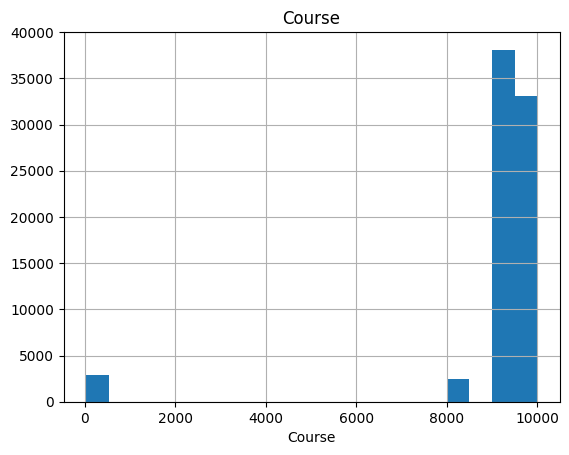

count   76518.000
mean        3.659
std         8.624
min         1.000
5%          1.000
10%         1.000
20%         1.000
30%         1.000
40%         1.000
50%         1.000
60%         1.000
70%         1.000
80%         1.000
90%         9.000
95%        19.000
99%        39.000
max        43.000
Name: Previous qualification, dtype: float64


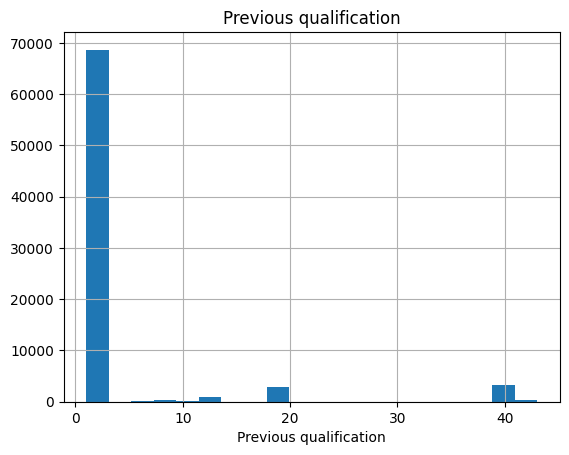

count   76518.000
mean      132.379
std        10.995
min        95.000
5%        115.000
10%       120.000
20%       123.000
30%       128.000
40%       130.000
50%       133.100
60%       133.100
70%       137.000
80%       140.000
90%       145.000
95%       150.000
99%       160.000
max       190.000
Name: Previous qualification (grade), dtype: float64


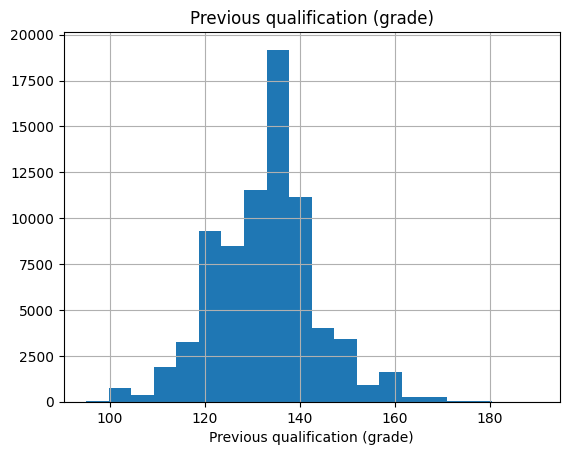

count   76518.000
mean        1.227
std         3.392
min         1.000
5%          1.000
10%         1.000
20%         1.000
30%         1.000
40%         1.000
50%         1.000
60%         1.000
70%         1.000
80%         1.000
90%         1.000
95%         1.000
99%         1.000
max       109.000
Name: Nacionality, dtype: float64


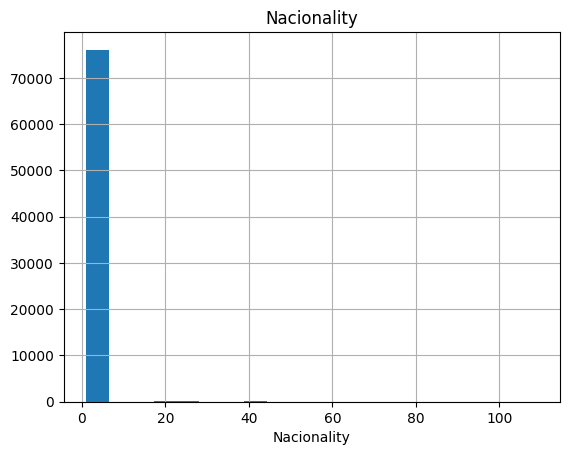

count   76518.000
mean       19.838
std        15.399
min         1.000
5%          1.000
10%         1.000
20%         1.000
30%         3.000
40%        19.000
50%        19.000
60%        19.000
70%        37.000
80%        37.000
90%        38.000
95%        38.000
99%        38.000
max        44.000
Name: Mother's qualification, dtype: float64


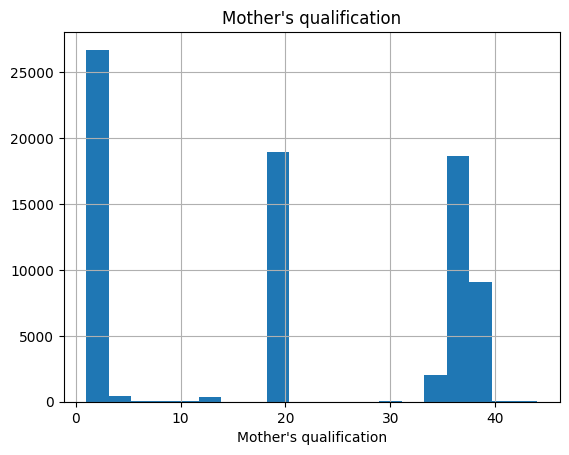

count   76518.000
mean       23.425
std        14.921
min         1.000
5%          1.000
10%         1.000
20%         1.000
30%        19.000
40%        19.000
50%        19.000
60%        37.000
70%        37.000
80%        37.000
90%        38.000
95%        38.000
99%        38.000
max        44.000
Name: Father's qualification, dtype: float64


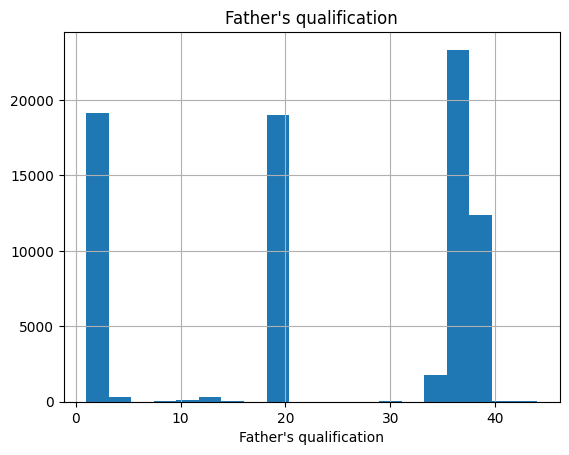

count   76518.000
mean        8.583
std        17.472
min         0.000
5%          2.000
10%         3.000
20%         4.000
30%         4.000
40%         5.000
50%         7.000
60%         9.000
70%         9.000
80%         9.000
90%         9.000
95%         9.000
99%        90.000
max       194.000
Name: Mother's occupation, dtype: float64


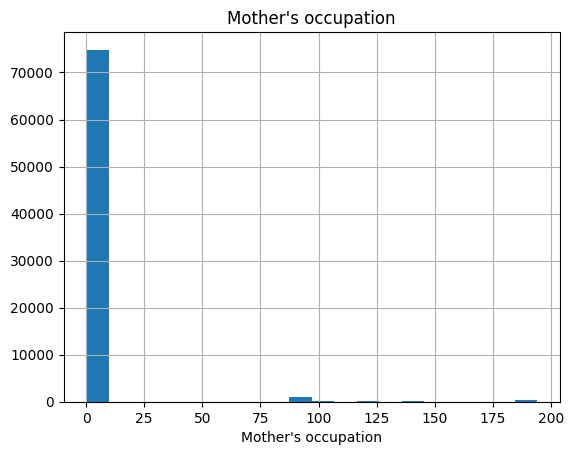

count   76518.000
mean        8.882
std        16.804
min         0.000
5%          2.000
10%         3.000
20%         4.000
30%         5.000
40%         7.000
50%         7.000
60%         8.000
70%         9.000
80%         9.000
90%         9.000
95%        10.000
99%        90.000
max       195.000
Name: Father's occupation, dtype: float64


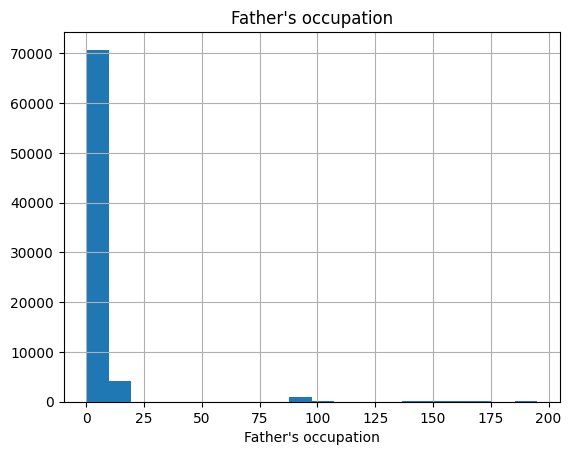

count   76518.000
mean      125.364
std        12.562
min        95.000
5%        104.300
10%       110.000
20%       116.100
30%       119.600
40%       121.600
50%       124.600
60%       127.500
70%       130.000
80%       134.500
90%       140.000
95%       149.400
99%       160.000
max       190.000
Name: Admission grade, dtype: float64


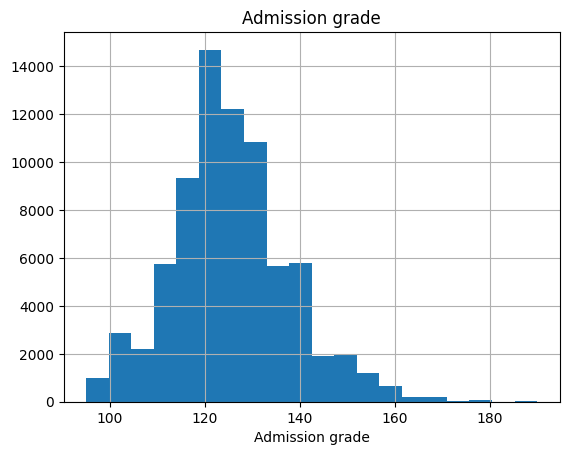

count   76518.000
mean       22.279
std         6.889
min        17.000
5%         18.000
10%        18.000
20%        18.000
30%        19.000
40%        19.000
50%        19.000
60%        20.000
70%        21.000
80%        25.000
90%        32.000
95%        38.000
99%        49.000
max        70.000
Name: Age at enrollment, dtype: float64


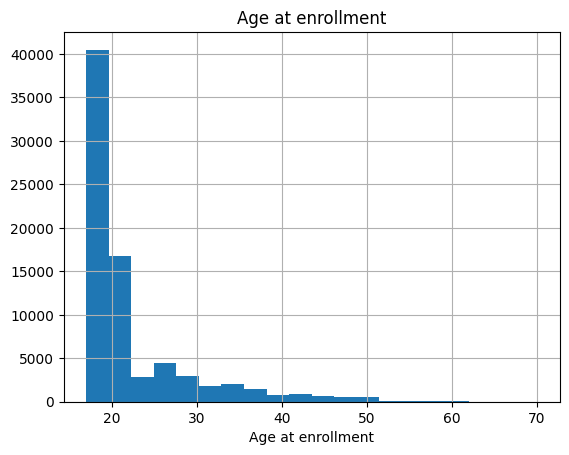

count   76518.000
mean        0.189
std         1.175
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         0.000
80%         0.000
90%         0.000
95%         0.000
99%         7.000
max        20.000
Name: Curricular units 1st sem (credited), dtype: float64


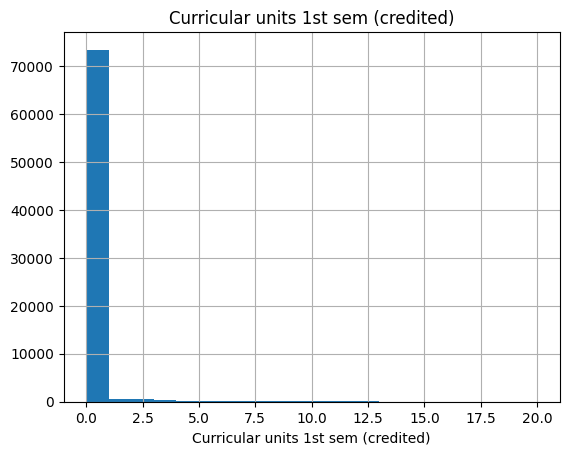

count   76518.000
mean        5.892
std         1.672
min         0.000
5%          5.000
10%         5.000
20%         5.000
30%         6.000
40%         6.000
50%         6.000
60%         6.000
70%         6.000
80%         6.000
90%         7.000
95%         8.000
99%        12.000
max        26.000
Name: Curricular units 1st sem (enrolled), dtype: float64


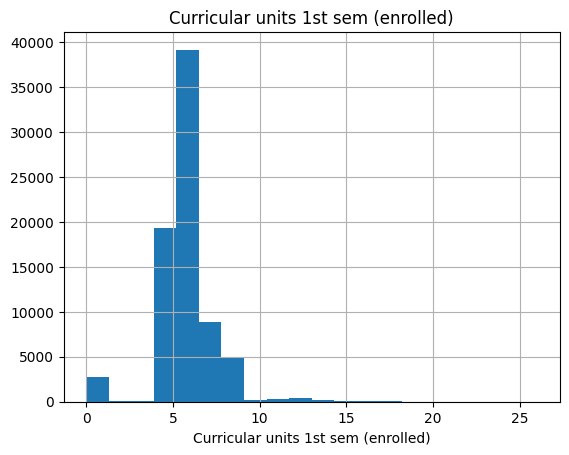

count   76518.000
mean        7.352
std         3.508
min         0.000
5%          0.000
10%         0.000
20%         6.000
30%         6.000
40%         7.000
50%         7.000
60%         8.000
70%         8.000
80%        10.000
90%        11.000
95%        13.000
99%        16.000
max        45.000
Name: Curricular units 1st sem (evaluations), dtype: float64


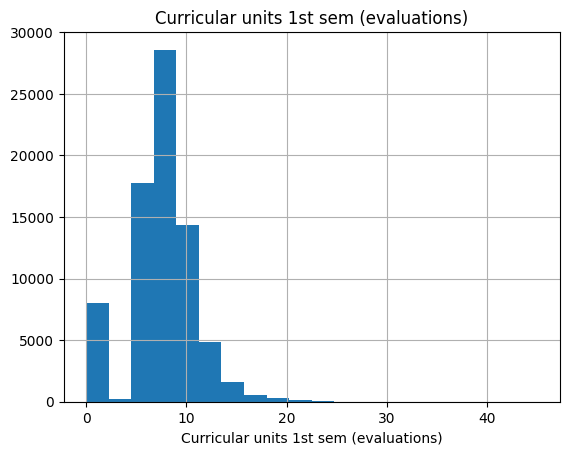

count   76518.000
mean        4.179
std         2.688
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         3.000
40%         4.000
50%         5.000
60%         6.000
70%         6.000
80%         6.000
90%         7.000
95%         7.000
99%        11.000
max        26.000
Name: Curricular units 1st sem (approved), dtype: float64


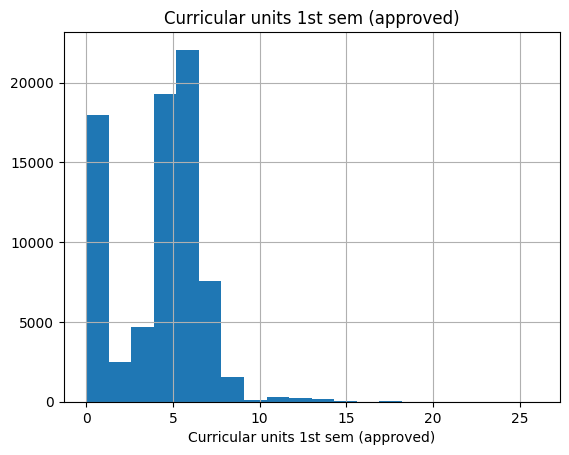

count   76518.000
mean        9.996
std         5.264
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%        11.000
40%        11.750
50%        12.167
60%        12.667
70%        13.000
80%        13.500
90%        14.000
95%        14.573
99%        15.400
max        18.875
Name: Curricular units 1st sem (grade), dtype: float64


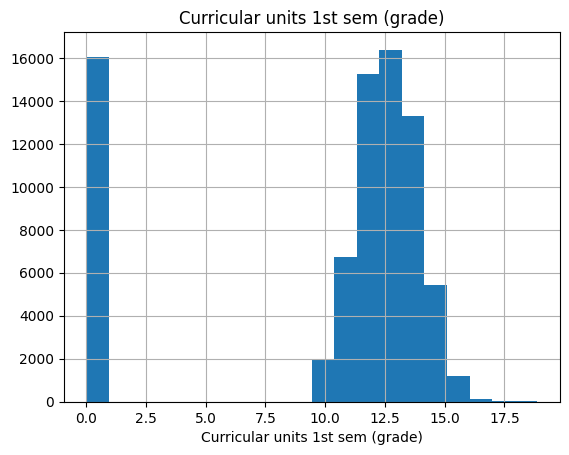

count   76518.000
mean        0.058
std         0.408
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         0.000
80%         0.000
90%         0.000
95%         0.000
99%         2.000
max        12.000
Name: Curricular units 1st sem (without evaluations), dtype: float64


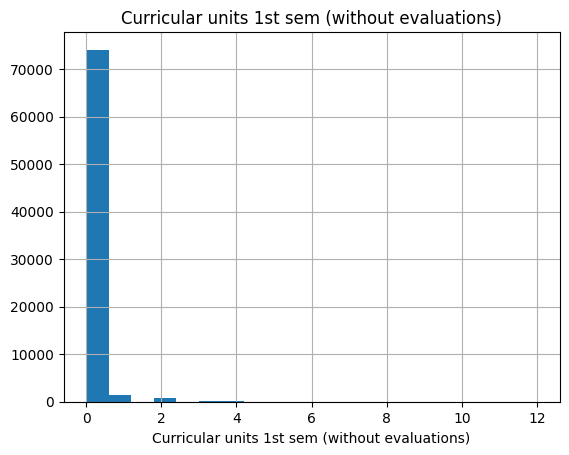

count   76518.000
mean        0.137
std         0.934
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         0.000
80%         0.000
90%         0.000
95%         0.000
99%         5.000
max        19.000
Name: Curricular units 2nd sem (credited), dtype: float64


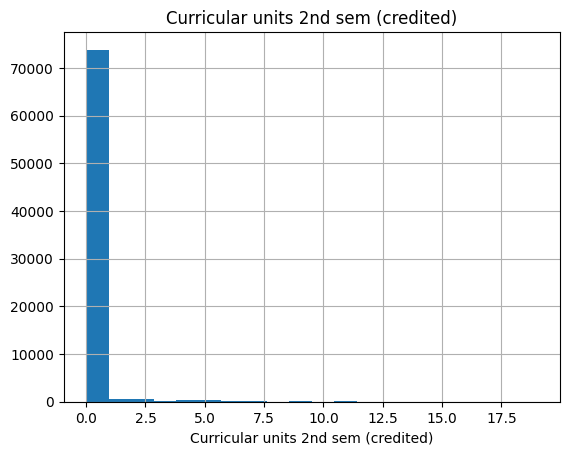

count   76518.000
mean        5.933
std         1.627
min         0.000
5%          5.000
10%         5.000
20%         5.000
30%         6.000
40%         6.000
50%         6.000
60%         6.000
70%         6.000
80%         6.000
90%         8.000
95%         8.000
99%        11.000
max        23.000
Name: Curricular units 2nd sem (enrolled), dtype: float64


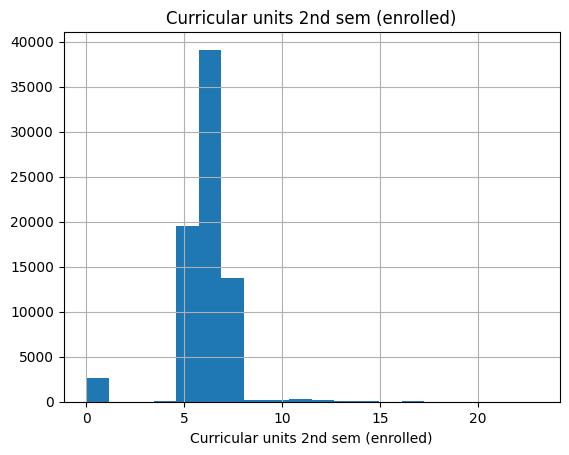

count   76518.000
mean        7.234
std         3.503
min         0.000
5%          0.000
10%         0.000
20%         6.000
30%         6.000
40%         7.000
50%         7.000
60%         8.000
70%         9.000
80%        10.000
90%        11.000
95%        12.150
99%        16.000
max        33.000
Name: Curricular units 2nd sem (evaluations), dtype: float64


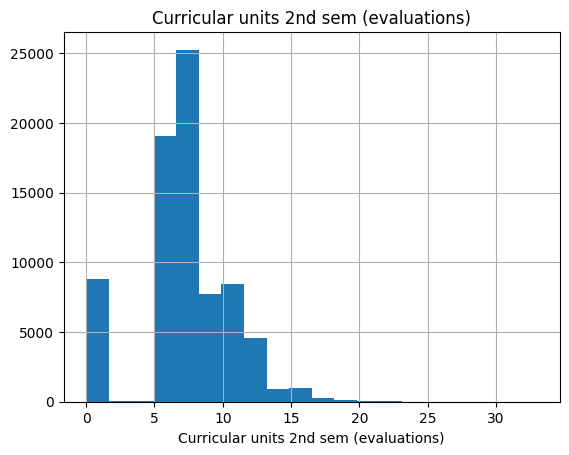

count   76518.000
mean        4.007
std         2.773
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         2.000
40%         4.000
50%         5.000
60%         5.000
70%         6.000
80%         6.000
90%         7.000
95%         8.000
99%         9.000
max        20.000
Name: Curricular units 2nd sem (approved), dtype: float64


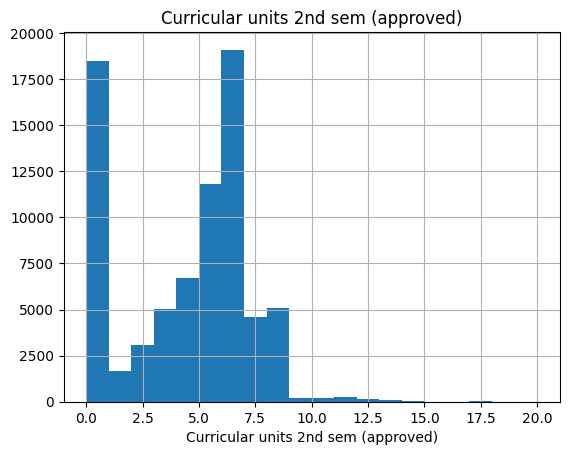

count   76518.000
mean        9.626
std         5.546
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%        11.000
40%        11.600
50%        12.143
60%        12.600
70%        13.000
80%        13.500
90%        14.167
95%        14.667
99%        15.600
max        18.000
Name: Curricular units 2nd sem (grade), dtype: float64


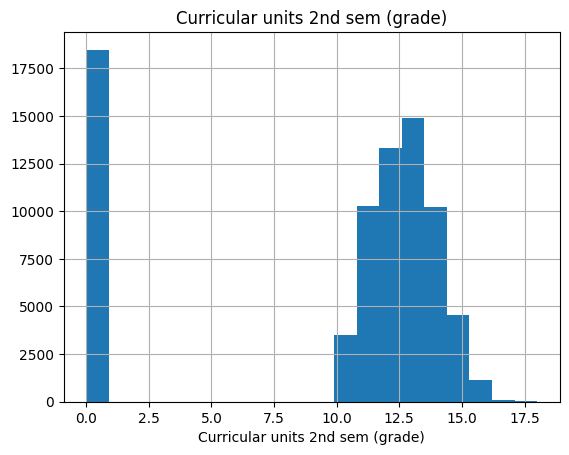

count   76518.000
mean        0.062
std         0.462
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         0.000
80%         0.000
90%         0.000
95%         0.000
99%         2.000
max        12.000
Name: Curricular units 2nd sem (without evaluations), dtype: float64


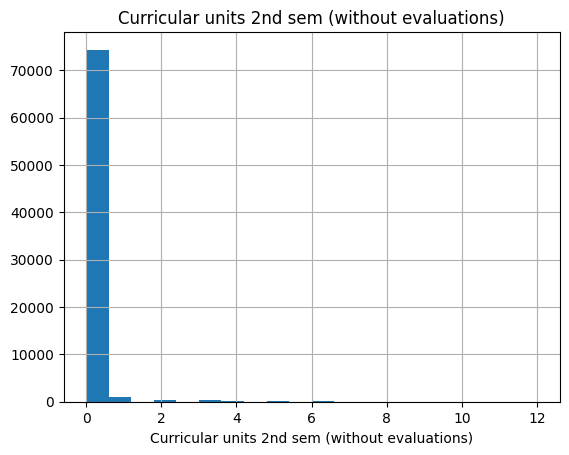

count   76518.000
mean       11.520
std         2.653
min         7.600
5%          7.600
10%         7.600
20%         8.900
30%         9.400
40%        10.800
50%        11.100
60%        12.400
70%        12.700
80%        13.900
90%        15.500
95%        16.200
99%        16.200
max        16.200
Name: Unemployment rate, dtype: float64


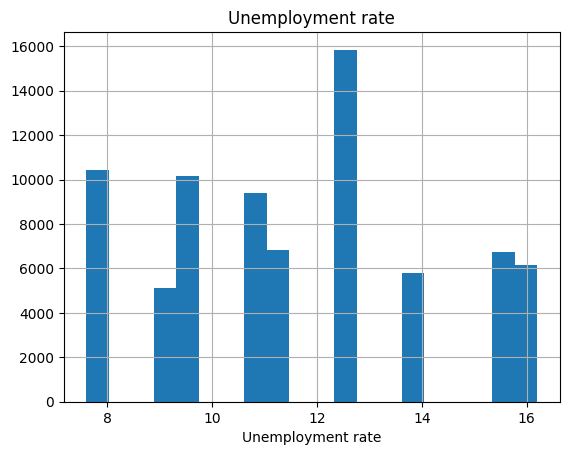

count   76518.000
mean        1.228
std         1.399
min        -0.800
5%         -0.800
10%        -0.800
20%        -0.300
30%         0.500
40%         0.600
50%         1.400
60%         1.400
70%         2.600
80%         2.600
90%         2.800
95%         3.700
99%         3.700
max         3.700
Name: Inflation rate, dtype: float64


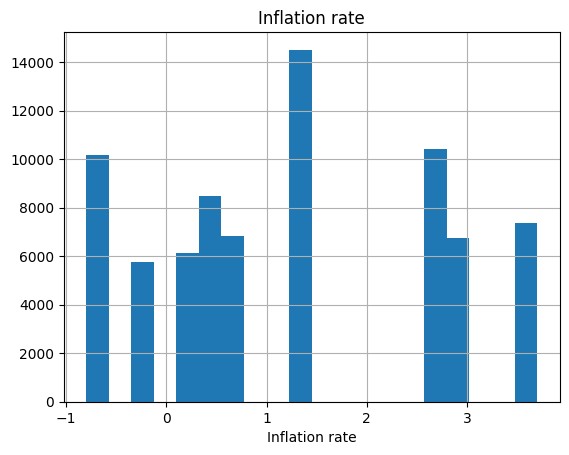

count   76518.000
mean       -0.081
std         2.251
min        -4.060
5%         -4.060
10%        -3.120
20%        -3.120
30%        -1.700
40%         0.320
50%         0.320
60%         0.790
70%         1.740
80%         1.790
90%         2.020
95%         3.510
99%         3.510
max         3.510
Name: GDP, dtype: float64


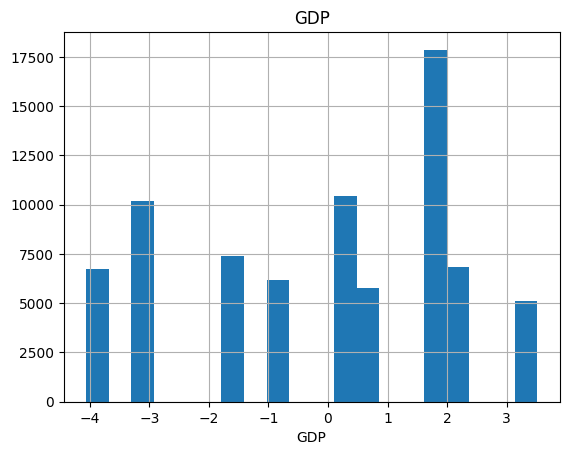

In [10]:
# Analysis of num_cols
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(train, col, plot=True)

In [11]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in train.columns if col in cat_cols and train[col].nunique() == 2]
binary_cols

for col in binary_cols:
    train = label_encoder(train, col)

binary_cols

['Daytime/evening attendance',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International']

In [12]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

train = one_hot_encoder(train, cat_cols, drop_first=True)
train.head()

,id,Application mode,Course,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Application order_1,Application order_2,Application order_3,Application order_4,Application order_5,Application order_6,Application order_9,Daytime/evening attendance_1,Displaced_1,Educational special needs_1,Debtor_1,Tuition fees up to date_1,Gender_1,Scholarship holder_1,International_1
0,0,1,9238,1,126.000,1,1,19,5,5,122.600,18,0,6,6,6,14.500,0,0,6,7,6,12.429,0,11.100,0.600,2.020,Graduate,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False
1,1,17,9238,1,125.000,1,19,19,9,9,119.800,18,0,6,8,4,11.600,0,0,6,9,0,0.000,0,11.100,0.600,2.020,Dropout,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,True,False,False,False
2,2,17,9254,1,137.000,1,3,19,2,3,144.700,18,0,6,0,0,0.000,0,0,6,0,0,0.000,0,16.200,0.300,-0.920,Dropout,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,True,False,False
3,3,1,9500,1,131.000,1,19,3,3,2,126.100,18,0,7,9,7,12.591,0,0,8,11,7,12.820,0,11.100,0.600,2.020,Enrolled,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False,True,False
4,4,1,9500,1,132.000,1,19,37,4,9,120.100,18,0,7,12,6,12.933,0,0,7,12,6,12.933,0,7.600,2.600,0.320,Graduate,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,True,False,False,False


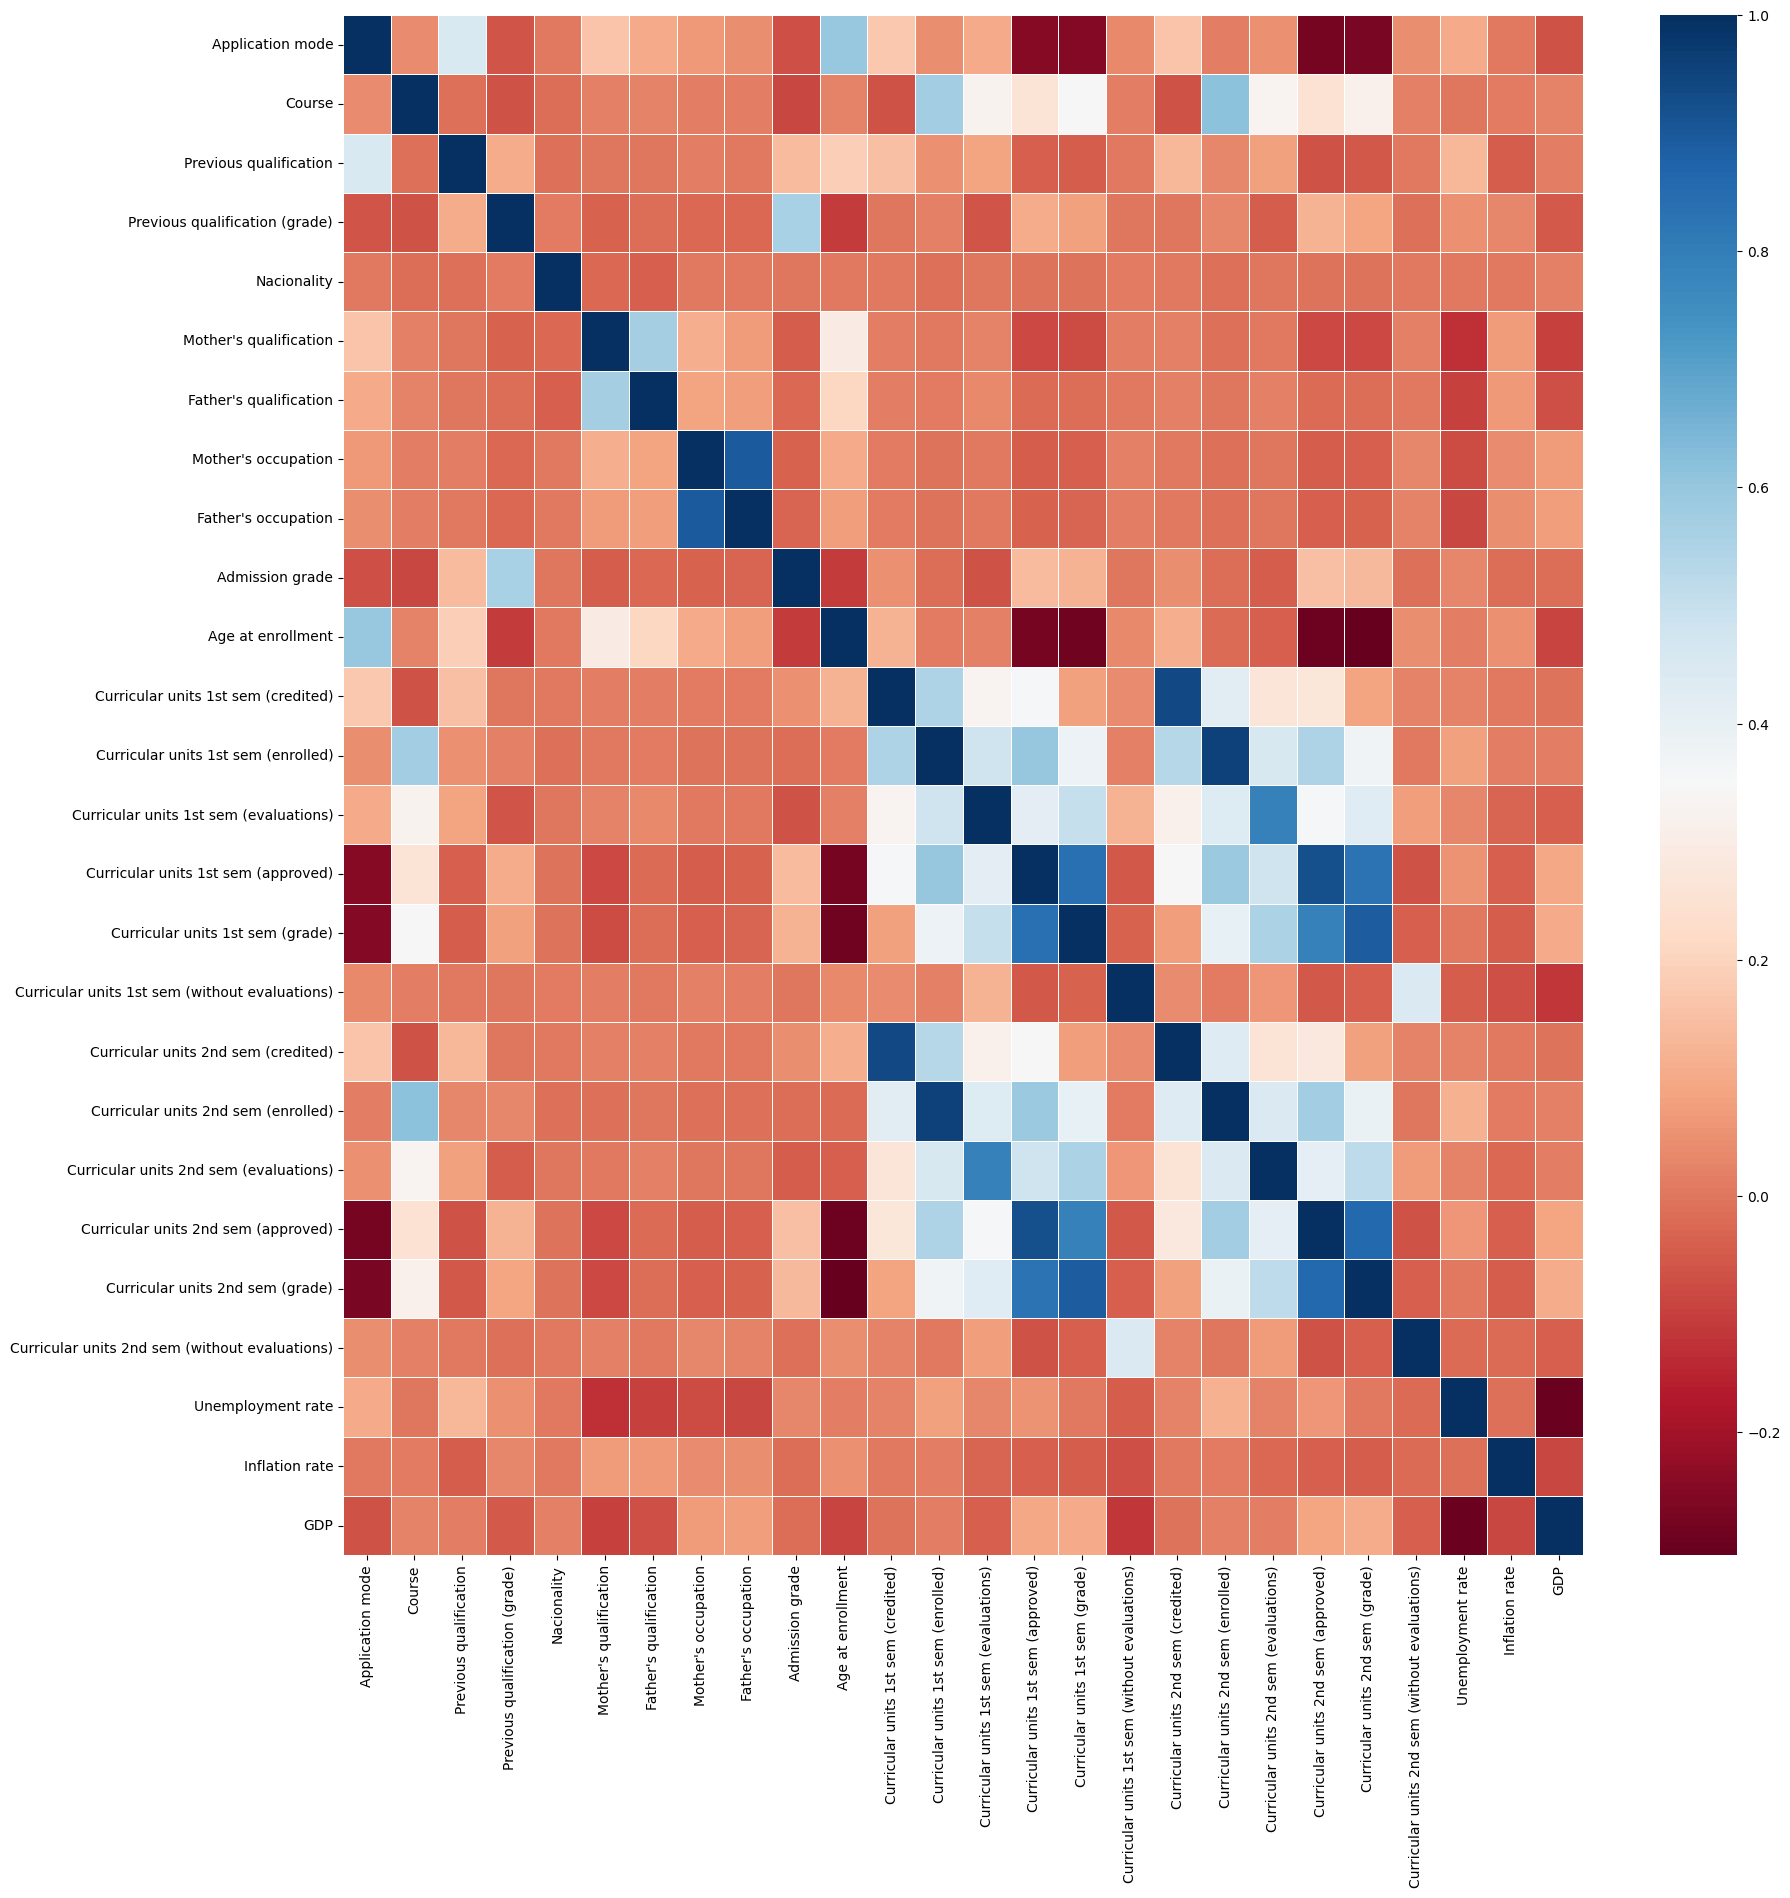

In [13]:
#correlation analysis of numerical variables
correlation_matrix(train, num_cols)

> # 3. PYCARET

> It is an open source library that automates machine learning workflows in Python. Here we will use pycaret to compare ML models and decide which one to use.

In [14]:
from pycaret.classification import *
s = setup(data=train, target='Target', session_id=123, normalize=True)

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Multiclass
3,Target mapping,"Dropout: 0, Enrolled: 1, Graduate: 2"
4,Original data shape,"(76518, 48)"
5,Transformed data shape,"(76518, 48)"
6,Transformed train set shape,"(53562, 48)"
7,Transformed test set shape,"(22956, 48)"
8,Numeric features,27
9,Preprocess,True


In [15]:
best = compare_models(exclude=["ridge", "lda", "qda", "svm","lr","dummy","nb"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8304,0.9420,0.8304,0.8289,0.8285,0.7268,0.7281,8.0270
lightgbm,Light Gradient Boosting Machine,0.8303,0.9431,0.8303,0.8296,0.8286,0.7267,0.7282,6.3540
catboost,CatBoost Classifier,0.8297,0.9434,0.8297,0.8281,0.8276,0.7255,0.7269,28.9130
gbc,Gradient Boosting Classifier,0.8270,0.0000,0.8270,0.8261,0.8251,0.7211,0.7227,48.7590
rf,Random Forest Classifier,0.8251,0.9374,0.8251,0.8236,0.8227,0.7176,0.7194,14.4480
et,Extra Trees Classifier,0.8205,0.9354,0.8205,0.8191,0.8178,0.7098,0.7121,13.8030
ada,Ada Boost Classifier,0.8188,0.0000,0.8188,0.8194,0.8173,0.7080,0.7099,5.2870
knn,K Neighbors Classifier,0.7708,0.8831,0.7708,0.7644,0.7662,0.6293,0.6308,5.7450
dt,Decision Tree Classifier,0.7393,0.8015,0.7393,0.7413,0.7402,0.5859,0.5860,1.9270


Processing:   0%|          | 0/41 [00:00<?, ?it/s]

>  PyCaret compares all models and stores the model with the best score.Although XGBoost gave better results, it seems more logical to use lightgbm considering the time difference between them.

> # 4.MODELLING

> Building the model with the best algorithm found and predict with this model.

In [16]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8365,0.9455,0.8365,0.8359,0.8352,0.7372,0.7382
1,0.8234,0.9414,0.8234,0.8219,0.8215,0.7155,0.7169
2,0.8191,0.9380,0.8191,0.8180,0.8171,0.7081,0.7098
3,0.8426,0.9487,0.8426,0.8425,0.8413,0.7467,0.7481
4,0.8279,0.9441,0.8279,0.8270,0.8263,0.7228,0.7241
5,0.8297,0.9407,0.8297,0.8263,0.8262,0.7244,0.7265
6,0.8297,0.9430,0.8297,0.8294,0.8281,0.7256,0.7272
7,0.8260,0.9427,0.8260,0.8269,0.8250,0.7200,0.7216
8,0.8338,0.9422,0.8338,0.8321,0.8318,0.7323,0.7335


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
preds = predict_model(lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8312,0.9439,0.8312,0.8315,0.8301,0.7286,0.7299


In [18]:
preds

,id,Application mode,Course,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Displaced_1,Educational special needs_1,Debtor_1,Tuition fees up to date_1,Gender_1,Scholarship holder_1,International_1,Target,prediction_label,prediction_score
66762,66762,1,9853,1,122.000,1,19,37,3,7,...,True,False,False,True,False,False,False,Enrolled,Enrolled,0.798
25187,25187,17,9147,1,158.000,1,37,37,9,6,...,True,False,False,True,True,False,False,Enrolled,Enrolled,0.699
21770,21770,17,9773,1,109.000,1,1,1,4,8,...,True,False,False,True,False,False,False,Dropout,Dropout,0.909
10360,10360,1,9500,1,138.000,1,19,19,9,10,...,True,False,False,True,False,False,False,Graduate,Graduate,0.951
12696,12696,39,9670,1,133.100,1,19,38,9,7,...,False,False,True,False,True,False,False,Dropout,Dropout,0.963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59309,59309,1,9500,1,135.000,1,37,37,9,7,...,True,False,False,True,False,False,False,Graduate,Graduate,0.971
69019,69019,1,9238,1,141.000,1,38,37,5,9,...,False,False,False,True,False,True,False,Graduate,Graduate,0.981
46905,46905,39,9119,1,133.100,1,37,37,90,90,...,False,False,False,False,True,False,False,Dropout,Dropout,0.993
12065,12065,44,9085,39,150.000,1,37,37,9,8,...,True,False,False,True,False,True,False,Graduate,Graduate,0.873


> # 5. PREDICT AND SUBMISSION

In [19]:
cat_cols, num_cols, cat_but_car = grab_col_names(test)
num_cols = [col for col in num_cols if col not in ("id")]
cat_cols = [col for col in cat_cols if col not in ("Target")]

Observations: 51012
Variables: 37
cat_cols: 10
num_cols: 27
cat_but_car: 0
num_but_cat: 10


In [20]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in test.columns if col in cat_cols and test[col].nunique() == 2]
binary_cols

for col in binary_cols:
    test = label_encoder(test, col)

binary_cols

['Daytime/evening attendance',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International']

In [21]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

test = one_hot_encoder(test, cat_cols, drop_first=True)
test.head()

,id,Application mode,Course,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Application order_6,Application order_9,Daytime/evening attendance_1,Displaced_1,Educational special needs_1,Debtor_1,Tuition fees up to date_1,Gender_1,Scholarship holder_1,International_1
0,76518,1,9500,1,141.000,1,3,1,2,3,...,False,False,True,False,False,False,False,False,False,False
1,76519,1,9238,1,128.000,1,1,19,4,5,...,False,False,True,False,False,False,True,False,False,False
2,76520,1,9238,1,118.000,1,1,19,4,9,...,False,False,True,False,False,False,True,False,True,False
3,76521,44,9147,39,130.000,1,1,19,3,3,...,False,False,True,False,False,False,True,False,True,False
4,76522,39,9670,1,110.000,1,1,37,5,5,...,False,False,True,True,False,False,True,False,False,False


In [22]:
test_preds = predict_model(lgbm, data = test)
test_preds

,id,Application mode,Course,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Daytime/evening attendance_1,Displaced_1,Educational special needs_1,Debtor_1,Tuition fees up to date_1,Gender_1,Scholarship holder_1,International_1,prediction_label,prediction_score
0,76518,1,9500,1,141.000,1,3,1,2,3,...,True,False,False,False,False,False,False,False,Dropout,0.995
1,76519,1,9238,1,128.000,1,1,19,4,5,...,True,False,False,False,True,False,False,False,Graduate,0.967
2,76520,1,9238,1,118.000,1,1,19,4,9,...,True,False,False,False,True,False,True,False,Graduate,0.739
3,76521,44,9147,39,130.000,1,1,19,3,3,...,True,False,False,False,True,False,True,False,Graduate,0.370
4,76522,39,9670,1,110.000,1,1,37,5,5,...,True,True,False,False,True,False,False,False,Enrolled,0.596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,1,171,1,128.000,1,38,37,7,10,...,True,True,False,False,True,False,False,False,Dropout,0.809
51008,127526,39,9119,19,133.100,1,19,37,9,9,...,True,False,False,True,False,True,False,False,Dropout,0.991
51009,127527,1,171,1,127.000,1,1,1,4,10,...,True,False,False,True,False,False,False,False,Dropout,0.976
51010,127528,1,9773,1,132.000,1,19,19,5,5,...,True,True,False,True,False,False,False,False,Dropout,0.903


In [23]:
dictionary = {"id":test_preds["id"], "Target":test_preds["prediction_label"]}
dfSubmission = pd.DataFrame(dictionary)
dfSubmission.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled


In [24]:
dfSubmission.to_csv('submission.csv',index = False)